# Импорт зависимостей

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

GDRIVE_DATASET_PATH = f'/content/drive/MyDrive/HEALTH_MORTALITY.csv'

# Загрузка датасета, вывод базовой сводной информации

In [3]:
df = pd.read_csv(GDRIVE_DATASET_PATH)
df.info()     #Вывод общей информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156385 entries, 0 to 156384
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COUNTRY      156385 non-null  object 
 1   Country      156385 non-null  object 
 2   WEEK         156385 non-null  int64  
 3   Week number  156385 non-null  int64  
 4   GENDER       156385 non-null  object 
 5   Gender       156385 non-null  object 
 6   AGE          156385 non-null  object 
 7   Age          156385 non-null  object 
 8   VARIABLE     156385 non-null  object 
 9   Variable     156385 non-null  object 
 10  YEAR         156385 non-null  int64  
 11  Year         156385 non-null  int64  
 12  Value        156385 non-null  float64
 13  Flag Codes   614 non-null     object 
 14  Flags        614 non-null     object 
dtypes: float64(1), int64(4), object(10)
memory usage: 17.9+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(20) #Вывод заголовка и N записей таблицы

,COUNTRY,Country,WEEK,Week number,GENDER,Gender,AGE,Age,VARIABLE,Variable,YEAR,Year,Value,Flag Codes,Flags
0,AUS,Australia,1,1,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2015,2015,68.0,NaN,NaN
1,AUS,Australia,1,1,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2016,2016,49.0,NaN,NaN
2,AUS,Australia,1,1,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2017,2017,55.0,NaN,NaN
3,AUS,Australia,1,1,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2018,2018,51.0,NaN,NaN
4,AUS,Australia,1,1,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2019,2019,54.0,NaN,NaN
5,AUS,Australia,1,1,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2020,2020,44.0,NaN,NaN
6,AUS,Australia,2,2,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2015,2015,44.0,NaN,NaN
7,AUS,Australia,2,2,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2016,2016,59.0,NaN,NaN
8,AUS,Australia,2,2,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2017,2017,68.0,NaN,NaN
9,AUS,Australia,2,2,TOTAL,Total,Y0T44,0 to 44,ALLCAUNB,All-cause deaths (number),2018,2018,44.0,NaN,NaN


# Выборочный анализ данных

In [ ]:
df.describe(include=np.int64) #include/exclude, 'all' (вывод информации по определенному типу)

,WEEK,Week number,YEAR
count,111779.000000,111779.000000,111779.000000
mean,25.749452,25.749452,2017.848719
std,15.362892,15.362892,1.852725
min,1.000000,1.000000,2015.000000
25%,12.000000,12.000000,2016.000000
50%,25.000000,25.000000,2018.000000
75%,39.000000,39.000000,2020.000000
max,53.000000,53.000000,2021.000000


Сводочная информация по конкретному столбцу

In [ ]:
df.COUNTRY.describe()

count     111779
unique        31
top          EST
freq        4298
Name: COUNTRY, dtype: object

Вывод уникальных значений столбца

In [ ]:
df.COUNTRY.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'GRC',
       'HUN', 'ISL', 'ITA', 'LUX', 'NLD', 'NOR', 'POL', 'PRT', 'SVK',
       'ESP', 'SWE', 'CHE', 'USA', 'CHL', 'EST', 'LVA', 'LTU', 'SVN',
       'DEU', 'NZL', 'GBR', 'ISR'], dtype=object)

Группировка по значениям одного из столбцов

In [ ]:
for g in df.groupby('YEAR'):
    print(g)

(2015,        COUNTRY    Country  WEEK  Week number  ...    Year  Value Flag Codes Flags
0          AUS  Australia     1            1  ...  2015.0   68.0        NaN   NaN
6          AUS  Australia     2            2  ...  2015.0   44.0        NaN   NaN
12         AUS  Australia     3            3  ...  2015.0   62.0        NaN   NaN
18         AUS  Australia     4            4  ...  2015.0   41.0        NaN   NaN
24         AUS  Australia     5            5  ...  2015.0   55.0        NaN   NaN
...        ...        ...   ...          ...  ...     ...    ...        ...   ...
101924     SVN   Slovenia    49           49  ...  2015.0  183.0        NaN   NaN
101930     SVN   Slovenia    50           50  ...  2015.0  208.0        NaN   NaN
101936     SVN   Slovenia    51           51  ...  2015.0  197.0        NaN   NaN
101942     SVN   Slovenia    52           52  ...  2015.0  171.0        NaN   NaN
101948     SVN   Slovenia    53           53  ...  2015.0  197.0        NaN   NaN

[16064 r

# Группировка и сортировка данных

Группировка с выводом суммы

In [ ]:
df.groupby('COUNTRY').agg('sum').sort_values('Value')[["Value"]]  #сколько умерло за 7 лет

,Value
COUNTRY,
ISL,56463.0
LUX,106887.4
EST,393121.0
NZL,407296.0
SVN,530441.8
ISR,575796.2
LVA,719340.6
NOR,1012016.2
LTU,1032448.4


Группировка с выводом средних значений

In [ ]:
df.groupby('COUNTRY').agg('mean').sort_values('Value')[["Value"]] #сколько умирает в среднем в неделю за 7 лет

,Value
COUNTRY,
ISL,13.179972
LUX,25.102724
EST,91.466031
SVN,123.646107
LVA,168.148808
NOR,236.673573
LTU,241.677996
FIN,314.597754
DNK,314.662705


Группировка с несколькими параметрами и сортировкой

In [ ]:
stats = df.groupby('COUNTRY').agg(['mean', 'sum'])[["Value"]]
stats.columns = ["Value_mean", "Value_sum"]
stats.sort_values('Value_sum')

,Value_mean,Value_sum
COUNTRY,,
ISL,13.179972,56463.0
LUX,25.102724,106887.4
EST,91.466031,393121.0
NZL,382.437559,407296.0
SVN,123.646107,530441.8
ISR,542.691989,575796.2
LVA,168.148808,719340.6
NOR,236.673573,1012016.2
LTU,241.677996,1032448.4


Пользовательские функции параметров

In [ ]:
def custom_diff(x):         #во сколько раз больше максимальное число умерших в неделю, чем минимальное по странам
  if (min(x)!=0):
    if (min(x) < 0):
      return abs(max(x) / min(x)) + 1
    else:
      return abs(max(x) / min(x))
  else:
    return abs(max(x) / 1)
  
df.groupby('COUNTRY').agg(['max', 'min', custom_diff])[["Value"]]

Value                     
             max     min  custom_diff
COUNTRY                              
AUS       3348.0  -326.0    11.269939
AUT       2550.0  -234.2    11.888130
BEL       4311.0  -541.8     8.956811
CAN       6905.0  -112.0    62.651786
CHE       2213.0  -302.4     8.318122
CHL       3982.0   -40.2   100.054726
COL       8175.0  -111.0    74.648649
CZE       4235.0  -154.0    28.500000
DEU      26777.0 -3296.2     9.123597
DNK       1337.0  -210.4     7.354563
ESP      20809.0 -1209.0    18.211745
EST        450.0  -100.0     5.500000
FIN       1334.0  -406.2     4.284097
FRA      19049.0 -1030.4    19.486995
GBR      24737.0 -1361.8    19.164929
GRC       3680.0  -489.8     8.513271
HUN       4165.0  -433.4    10.610060
IRL        477.0     0.0   477.000000
ISL        900.0  -100.0    10.000000
ISR       1289.0  -108.0    12.935185
ITA      23457.0 -1953.0    13.010753
JPN        703.0     0.0   703.000000
KOR        162.0     0.0   162.000000
LTU       1395.0  -189.2     8.373150
LUX       1400.0  -100.0    15.000000
LVA        836.0  -124.4     7.720257
MEX      44884.0  -206.2   218.672163
NLD       5085.0  -430.0    12.825581
NOR       1048.0  -201.6     6.198413
NZL        863.0   -94.6    10.122622
POL      16243.0  -598.6    28.134982
PRT       5032.0  -365.4    14.771210
SVK       2095.0  -114.0    19.377193
SVN        954.0  -100.0    10.540000
SWE       2569.0  -329.0     8.808511
TUR       1781.0     0.0  1781.000000
USA      84192.0 -9434.4     9.923938

Вычисление % от общей суммы смертей за все года

In [ ]:
deaths = df.groupby('COUNTRY').agg('sum')
deaths['total'] = deaths['Value'].sum()
deaths['perc'] = deaths.Value / deaths.total * 100
deaths[['perc']]

,perc
COUNTRY,
AUS,1.137747
AUT,1.409298
BEL,1.917543
CAN,4.599748
CHE,1.157307
CHL,1.607272
CZE,1.993754
DEU,6.221078
DNK,0.906026


# Визуализация данных

Вычисление количества упоминаний стран и суммы умерших

In [ ]:
stats = df.groupby('COUNTRY').agg(['count', 'sum'])[["Value"]]
stats.columns = ["COUNTRY_count", "Deaths_sum"]
stats.sort_values('Deaths_sum')

,COUNTRY_count,Deaths_sum
COUNTRY,,
ISL,4284,56463.0
LUX,4258,106887.4
EST,4298,393121.0
NZL,1065,407296.0
SVN,4290,530441.8
ISR,1061,575796.2
LVA,4278,719340.6
NOR,4276,1012016.2
LTU,4272,1032448.4


Диаграмма рассеяния для отношения количества упоминаний стран и суммы умерших

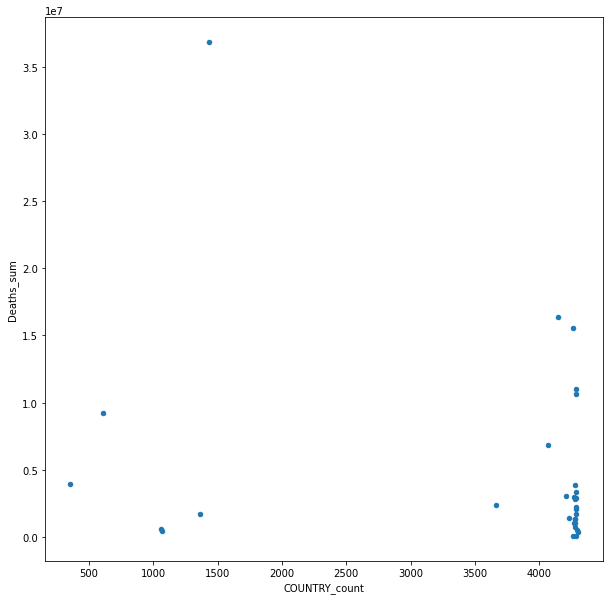

In [ ]:
stats.plot.scatter("COUNTRY_count", "Deaths_sum", figsize=(10, 10))

Круговая диаграмма суммы умерших 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d19b3f4d0>],
      dtype=object)

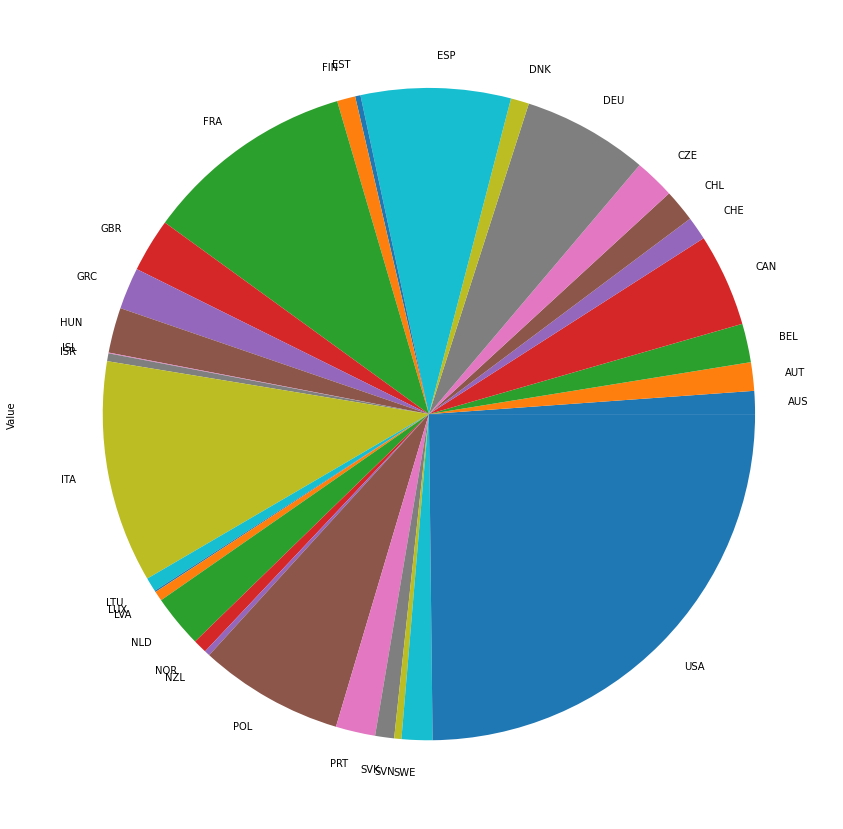

In [ ]:
df.groupby('COUNTRY').agg('sum').Value.plot.pie(subplots=True, figsize=(15, 15))

Круговая диаграмма упоминаний стран

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d195ea7d0>],
      dtype=object)

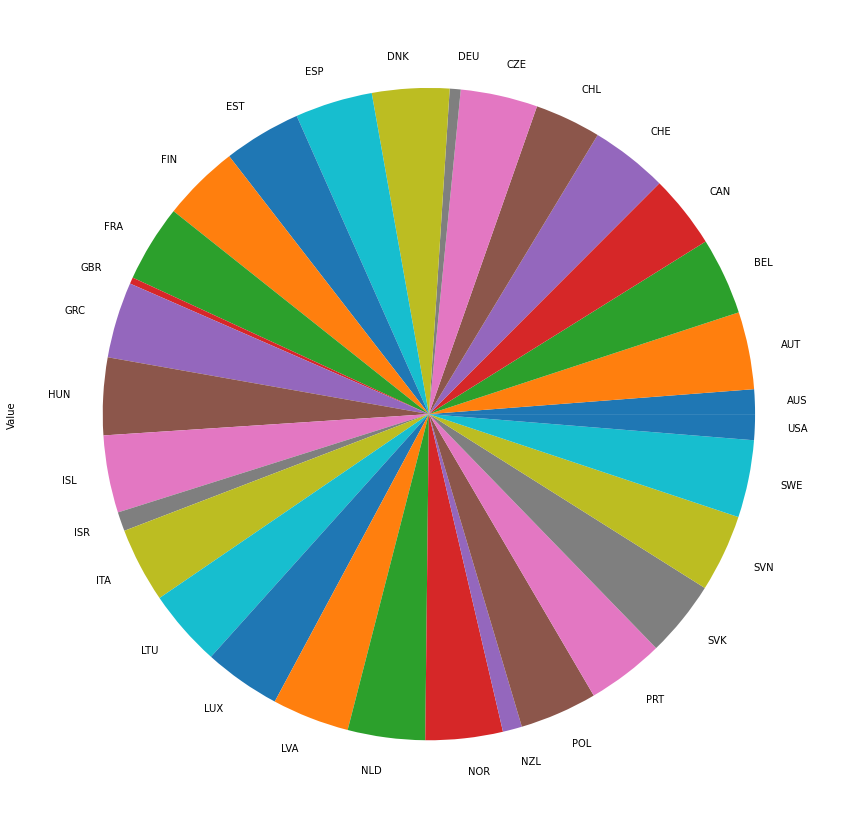

In [ ]:
df.groupby('COUNTRY').agg('count').Value.plot.pie(subplots=True, figsize=(15, 15))

In [ ]:
df.groupby('YEAR').agg('sum').Value.tolist()
keys = [key for key in df.groupby('YEAR').groups.keys()]
df.groupby('YEAR').groups

{2015: [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306, 312, 317, 324, 331, 338, 345, 352, 359, 366, 373, 380, 387, 394, 400, 406, 412, 418, 424, 430, 436, 442, 448, 454, 460, 466, 472, 478, 484, 490, 496, 502, 508, 514, 520, 526, 532, 538, 544, 550, 556, 562, 568, 574, 580, 586, 592, 598, 604, ...], 2016: [1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73, 79, 85, 91, 97, 103, 109, 115, 121, 127, 133, 139, 145, 151, 157, 163, 169, 175, 181, 187, 193, 199, 205, 211, 217, 223, 229, 235, 241, 247, 253, 259, 265, 271, 277, 283, 289, 295, 301, 307, 313, 318, 325, 332, 339, 346, 353, 360, 367, 374, 381, 388, 395, 401, 407, 413, 419, 425, 431, 437, 443, 449, 455, 461, 467, 473, 479, 485, 491, 497, 503, 509, 515, 521, 527, 533, 539, 545, 551, 557, 563, 569, 575, 581, 587, 593, 599, 605, ...], 2017: [2, 8

Визуализация при помощи Matplotlib

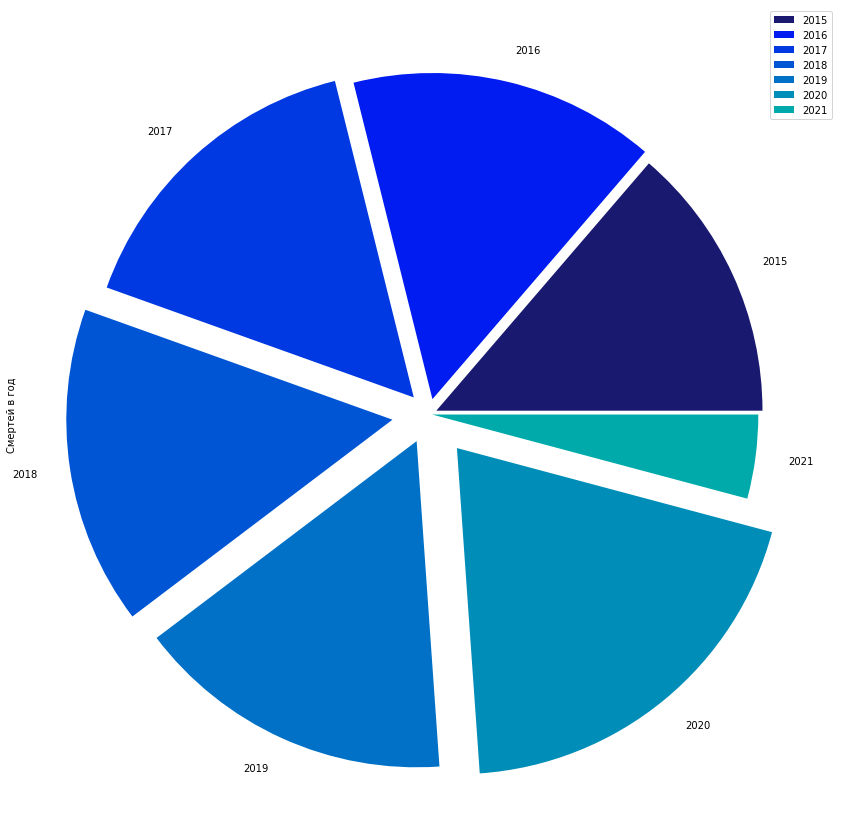

In [ ]:
counts = pd.Series(df.groupby('YEAR').agg('sum').Value.tolist(), 
                   index=[key for key in df.groupby('YEAR').groups.keys()])

# counts
explode = ( 0.025, 0.047, 0.069, 0.113, 0.091, 0.135, 0.01 )
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80']
# colors = ['#0000FF', '#FF0000',]


counts.plot(kind='pie', fontsize=10, explode=explode, colors=colors, figsize=(15, 15))
plt.ylabel('Смертей в год')
plt.legend(labels=counts.index)
plt.show()

In [ ]:
df.groupby('YEAR').agg('sum')[["Value"]]

,Value
YEAR,
2015,21145038.0
2016,22702435.0
2017,23394954.0
2018,23540177.0
2019,23483481.0
2020,28527206.2
2021,5642626.3


Представление в виде гистограммы

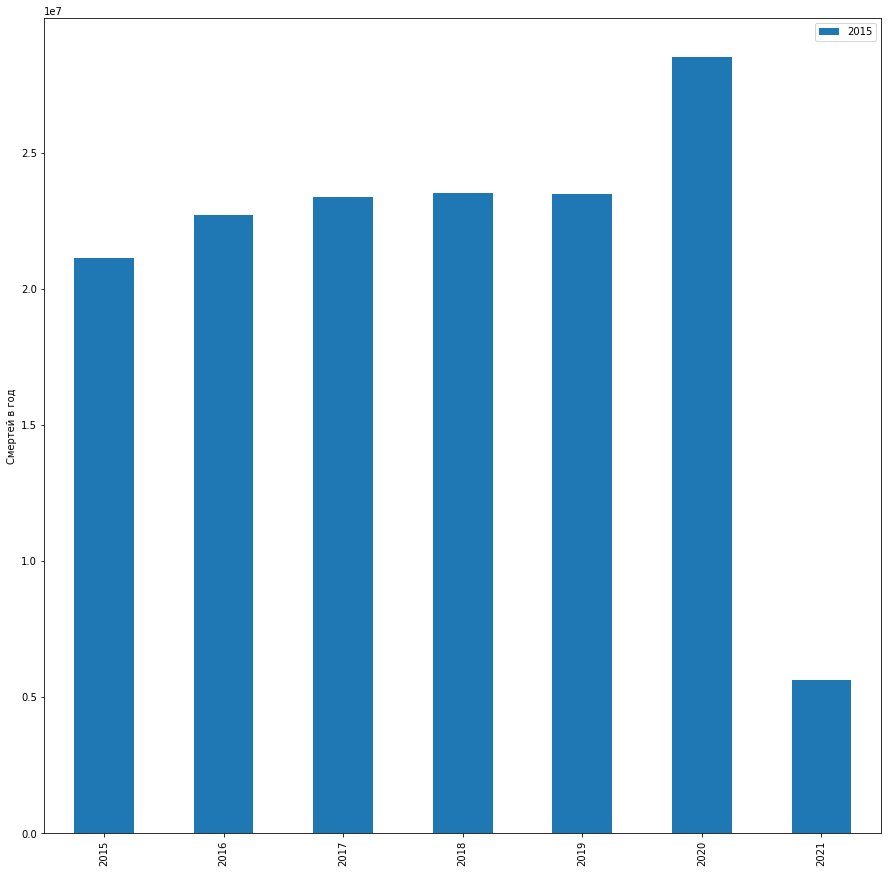

In [ ]:
counts = pd.Series(df.groupby('YEAR').agg('sum').Value.tolist(), 
                   index=[key for key in df.groupby('YEAR').groups.keys()])

counts.plot(kind='bar', fontsize=10, figsize=(15, 15))
plt.ylabel('Смертей в год')
plt.legend(labels=counts.index)
plt.show()